# Homework 5 - K-Means, Kernel Trick, Neural Networks
## CSCI 4622 - Fall 2021
***
**Name**:Tamer Shahwan
***

This assignment is due on Canvas by **11.59 PM on Wednesday, December 8**.
Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc.
Your solutions to analysis questions should be done in Markdown directly below the associated question.
Remember that you are encouraged to discuss the problems with your classmates and instructors,
but **you must write all code and solutions on your own**, and list any people or sources consulted.

Data Setup
---

For this problem set, we will be working with synthetic data in varying arrangements. In particular, we will use a "Blobs" dataset and a "Half-Moons" dataset.

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Tamer\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
from sklearn import datasets 
np.random.seed(0)

class BlobData:
    def __init__(self, c=4, n=5000):
        xx, yy = datasets.make_blobs(centers=c, n_samples=n)
        self.X = xx
        self.y = yy
        
class MoonData:
    def __init__(self, n=2000):
        xx, yy = datasets.make_moons(n_samples=n, noise=0.05)
        self.X = xx
        self.y = yy
                
blob_data = BlobData()
moon_data = MoonData()

Problem 1 - K-Means (Clustering) [45 Points]
---
K-means clustering is a type of unsupervised learning, which is used in the scenarios where you have unlabeled data. The goal of K-means is to partition the data into $k$ clusters such that the sum of intra-cluster variances is minimal.

We will be using Euclidian distance as our loss measure, so for cluster $C_i = \{x_1,x_2,... x_{m_i}\}$, its intra-cluster variance $V(C_i)$ is defined as:

$$
V(C_i) = \sum_{j=1}^{m_i} ||x_j - \mu_i||^2
$$

where $\mu_i = \frac{1}{m} \sum_{i=1}^{m_i} x_i$. $\mu_i$ is called the centroid of cluster $C_i$.

So for $k$ clusters, K-means objective is:
$$
\sum_{i=1}^{k}V(C_i) = \sum_{i=1}^{k} \sum_{j=1}^{m_i} ||x_j - \mu_i||^2
$$

Each point $x_i$ is assigned to the cluster of the closest centroid. Hence, finding The parition $\{C_1,C_2...C_k\}$ that minimizes the objective is equivalent to finding the optimal centroids. The cluster centroids are computed using the mean of the corresponding clusters ($C_1, ..., C_k$) which is equivalent to taking mean of the data points that lies inside the given cluster. 

#### Complete the KMeans class:
- **1.1 [5 points]** Complete the `cluster_assignment`: Given a single data point (_xi_), it computes the cluster to which it belongs. Calculate distance of the point _xi_ with all the centroids  and returns the index of self.centroid its closest to.
- **1.2 [5 points]** Complete `predict_labels` : Given data _X_ (n_rows  x n_features), returns labels (cluster no.). Use `cluster_assignments` over all _X_ and return cluster assignments corresponding to each _xi_
- **1.3 [5 points]** Complete `centroid_update`: Updates the centroids of each cluster. Compute the mean value of data points in each cluster and update the cluster centroids with the computed values. 
- **1.4 [10 points]** Complete the `fit`: Routine for running K-means. Follow instructions given in function.

In [82]:
class KMeans:
    def __init__(self, n_clusters=4, centroid_init=[]):
        """
        Parameters
        ----------
        n_clusters:  number of clusters
        centroid_init: Centroid Initialization (to be used for prediction)
        """             
        self.K = n_clusters
        self.centroids = centroid_init
        
    def cluster_assignment(self, xi):
        """
        Given a random data point (xi), compute the cluster to which it belongs.
        ----------
        xi: a single data point
        
        Returns: 
            ci: cluster assignment (label) of xi
        """
        ##BEGIN
        result= []
        for centroid in self.centroids:
            value = 0
            for feature in range(len(xi)):
                value =value + abs((xi[feature]-centroid[feature])**2)
            result.append(value)
        return(result.index(min(result)))
        ##END
    
    def predict_labels(self, X):
        """
        Predict label (cluster assignments) for the dataset.
        ----------
        X: given data (n_rows  x n_features)
        
        Returns: 
            labels: index of closest centroids (n_rows)  
        """
        ##BEGIN
        minimum =[]
        for data in X:
            data = list(data)
            label = self.cluster_assignment(data)
            minimum.append(label)
        return(minimum)
        ##END
    
    def centroid_update(self, X,labels):
        
        """
        Update the centroids (self.centroids) 
        : Compute the mean value of data points in each cluster 
          and update the cluster centroids with them. 
        ----------
        X: given data (n_rows  x n_features)
        
        Returns: nothing
        """
        ##BEGIN       

        new_centroid = []
        for cluster_index in range(self.K):
            holder_x = 0
            holder_y = 0
            total = 0
            for data_index in range(len(X)):
                if (cluster_index == labels[data_index]):
                    total = total + 1
                    holder_x = holder_x + X[data_index][0]
                    holder_y = holder_y + X[data_index][1]

            new_centroid.append((holder_x/total , holder_y/total))
        return(new_centroid)
        ##END
        
    def fit(self, X):
        """
        Run K-means.
        
        : Initialize a list of centroids (length self.K) with random values.   
        : Generate clusters using self.predict labels, using the dataset X.
        : Update the centroids using mean of clusters until they converge, 
          i.e, no change is observed in values of centroids.
        
        ----------
        X: given data (n_rows  x n_features)
        
        Returns: 
            self.centroids: Final values of the estimated centroids (length K)  
        
        """
        ##BEGIN
        flag = True
        counter = 0
        while flag:
            index_lst = [x for x in range(len(X))]
            np.random.seed(4622)
            #select random indices used for centroids assignment
            index = np.random.choice(index_lst,self.K,replace=False)
            for i in index:
                data = []
                for j in X[i]:
                    data.append(j)
                self.centroids.append(data)

            #labels contains a the closest centroid to each data point
            labels = self.predict_labels(X)

            result =self.centroid_update(X,labels)
            k = 0
            for centroid_index in range(len(result)):
                if result[centroid_index][0] == self.centroids[centroid_index][0]:
                    if result[centroid_index][1] == self.centroids[centroid_index][1]:
                        k = k+1
                        
            self.centroids = result

            if k == self.K:
                flag = False
            counter = counter +1
        print('iterations until converge:',counter)
        return(self.centroids)
        ##END

**1.5 a [5 points]** For each of the datasets (`blob_data` & `moon_data`), do the following:
- Produce a scatter plot data-points and color the points according to their labels.
- Observe the number of clusters in each data. Then fit K-means and show the computed centroids on the plot.

iterations until converge: 15


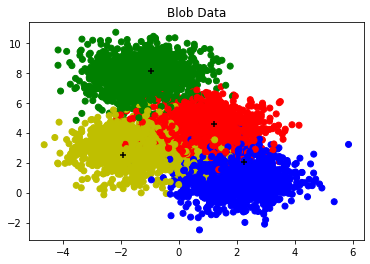

In [72]:
np.random.seed(4622)

##BEGIN
#useful link for coloring my datapoint according to labels: https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   2 : 'y',
                   3 : 'g',
                   }

label_color = [LABEL_COLOR_MAP[l] for l in blob_data.y]
plt.scatter([x[0] for x in blob_data.X], [x[1] for x in blob_data.X], c=label_color)
model = KMeans(n_clusters=4)
centroids=model.fit(blob_data.X)
plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='black', marker='+')
plt.title("Blob Data")

plt.show()
##END

iterations until converge: 7
[(1.9042301923721001, 0.1266956866042727), (-0.2832485283739474, 0.6067830410389846)]


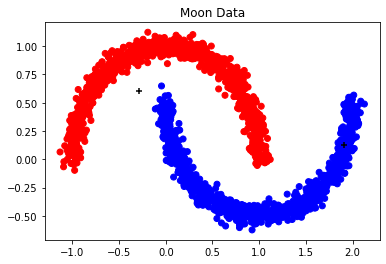

In [75]:
np.random.seed(4622)

##BEGIN

x_data =[]
y_data=[]
for i in moon_data.X:
    x_data.append(i[0]) 
    y_data.append(i[1])
#for i in range(len(moon_data.y)):
#    print(moon_data.y[i])
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   }

label_color = [LABEL_COLOR_MAP[l] for l in moon_data.y]
plt.scatter([x[0] for x in moon_data.X], [x[1] for x in moon_data.X], c=label_color)
model = KMeans(n_clusters=2)
centroids=model.fit(moon_data.X)
print(centroids)
x_centroid = []
y_centroid = []

plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='black', marker='+')
plt.title("Moon Data")

plt.show()
##END

**1.5 b [5 points]** For each of the datasets (`blob_data` & `moon_data`), do the following:
- Produce a scatter plot data-points and color the points according to their labels.
- Produce another scatter plot data-points and color the points according to their predicted labels

**NOTE:** The centroids obtained from KMeans `fit` can be used as the argument for `centroid_init` and then you'll be able to predict lables using `predict_labels` of the data-points.

iterations until converge: 15


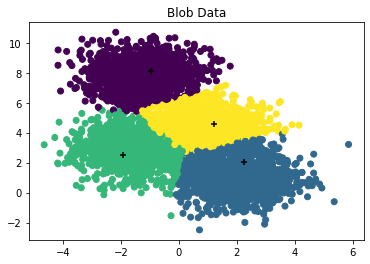

In [78]:
np.random.seed(4622)

##BEGIN
model = KMeans(n_clusters=4)
centroids=model.fit(blob_data.X)
labels = model.predict_labels(blob_data.X)
#useful link for coloring my datapoint according to labels: https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   2 : 'y',
                   3 : 'g',
                   }

#label_color = [LABEL_COLOR_MAP[l] for l in blob_data.y]
plt.scatter([x[0] for x in blob_data.X], [x[1] for x in blob_data.X], c=labels)

plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='black', marker='+')
plt.title("Blob Data")

plt.show()
##END

iterations until converge: 7


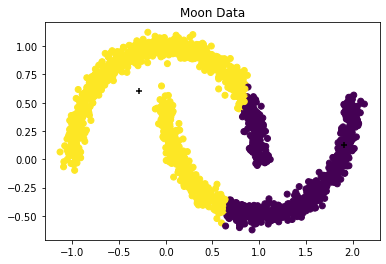

In [83]:
np.random.seed(4622)

##BEGIN
model = KMeans(n_clusters=2)
centroids=model.fit(moon_data.X)
labels = model.predict_labels(moon_data.X)
#useful link for coloring my datapoint according to labels: https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   2 : 'y',
                   3 : 'g',
                   }

#label_color = [LABEL_COLOR_MAP[l] for l in blob_data.y]
plt.scatter([x[0] for x in moon_data.X], [x[1] for x in moon_data.X], c=labels)

plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='black', marker='+')
plt.title("Moon Data")

plt.show()
##END

- **1.6 [5 points]** Comment on the quality of centroids obtained in the above question.

### Workspace 1.6

#### BEGIN
Blob data: great quality centroids as they almost fully capture the true labels.


Moon data: Bad quaility centroids. The two clusters are getting alot of incorrect predictions, which is due K means looking ONLY at the distance from centroid.
#### END


- **1.7 [5 points]** Based on the observation from above, give some disadvantages of KMeans.

### Workspace 1.7

#### BEGIN
K means fails at dealing with non convex clusters. Looking at the Moon data, it as difficilt for k means to capture the true shape of the cluster ( half a circle) since it assigns each data point to the centroid closest to it.  
#### END


## [Bonus 10 Points] K-means++ 
We have used a random centroid initialization in K-means. In K-means++, we initialize the centroids
in a (slightly) smarter way, and it works as the following:
- Choose the first centroid uniformly at random from the data points
- For the subsequent centroids:
    - compute the distances $(d_i)$ between the data points and the current centroids (distance between a point and its nearest centroid)
    - Pick a new centroid randomly with probability proportional to $(d_i ^2)$.

The rest of _K-means++_'s algorithm is exactly the same as _K-means_


**1.9 Bonus question [10 points]**  Complete the `KMeansPP` class:

- Complete the `initialize_centroids`: Initialize K-means++ centroids as described above. 
- Complete `compute_distaces`: Compute the distances matrix $D$ between data points and centroids.
- Complete `fit`: Implementing the KMeans++ algorithm mentioned above.
- Produce the same plot as done in **[1.5]** but using `KMeansPP`

_Hint_: The weighted sampling can be done using `numpy`'s `choice` and its argument `p`. You do not have to worry about excluding the already picked centroids from the data. Once they're picked, their sampling weight should be equal to $0$. Make sure the probabilities sum to $1$.

In [58]:
class KMeansPP:
    def __init__(self, n_clusters=4):
        self.K = n_clusters
        self.centroids = None
    
    def initialize_centroids(self, X):
        """
        Complete K-means++ centroid initialization.
        : Update self.centroids
        """
        # BEGIN  

        # END
    
    def compute_distances(self, X):
        """
        Computes the distance matrix of size (N, k) where each cell (i, j) represents the distance between
        i-th point and j-th centroid. 
        RETURN: 
            Distances_matrix : np.ndarray (no. of samples x K)
        """
        distances_matrix = np.zeros((X.shape[0], self.K))
        
        #BEGIN

        #END
        return distances_matrix
    
    def fit(self, X):
        """
        Complete the K-means++ as explained above.
        
        X: given data (n_rows  x n_features)
        RETURN: 
            list of final centroids (length K)
        """
        self.initialize_centroids(X)
        
        # BEGIN

        # END
        
        return self.centroids

In [5]:
np.random.seed(4622)

##BEGIN Workspace 1.9d

##END

Problem 2 - The Kernel Trick [15 Points]
---
A Kernel Trick is a simple method where non-linear data is projected onto a another dimension space so as to make it easier to classify the data where it could be linearly divided by a plane. The kernel trick make methods like support vector machines powerful. In this problem we will get familiar with the kernel trick.

 
_XOR_ is a logic unit that gives a true (1 or HIGH) output when the number of true inputs is odd. 
$$ \begin{array}{c|cccc} x_1 & 1 & 0 & 1 & 0 \\ x_2 & 1 & 0 & 0 & 1 \\ \hline x_1 \texttt{ XOR } x_2 & 0 & 0 & 1 & 1 \\ \end{array} $$

**2.1 [5 points]** Consider a support vector machine that computes the _XOR_ function, using values of +1 and −1 (instead of 1 and 0) for both inputs and outputs, so that an example looks like ($[−1, 1], 1$) or ($[−1, −1], -1$). Complete the following: 
- Map the input $[x_1, x_2]$ into a space consisting of $x_1$ and $x_1x_2$. 
- Plot the four input points in this space, and color them according the _XOR_ values. 
- Show maximal margin separator on the plot. 
- *Hint: it may be helpful to think about accomplishing this plotting task by hand, using pencil and paper, then translating it into a Python plot.*

_A Maximal Margin Separator is a hyperplane (in a 2-dimensional space, it is a line) that completely separates 2 classes of observations, while giving the most space between the hyperplane and the nearest observation. For example, a SVM tries to generate a Maximal Margin Separator._ 
- Give the margin value (distance between Maximal Margin Separator & one nearest point) in the markdown cell. 

Remember to use different colors to indicate which points have output +1 and which have -1.

In [6]:
##BEGIN

##END

### Workspace 2.1

#### BEGIN

#### END



**2.2 [5 points]** Plot the separating line (Maximal margin seperator) and the data points from **Part 1** back in the original Euclidean input space.

- *Hint: it may be helpful to think about accomplishing this plotting task by hand, using pencil and paper, then translating it into a Python plot.*
- *Hint: There would be multiple lines.*

In [7]:
##BEGIN

##END

#### Linearity and Non-Linearity: 
On a Plane, a linear function is a function where the graph is a straight line. The line can go in any direction, but it’s always a straight line. However, a non-linear function has a shape that is not a straight line.

**2.3 [5 points]** Is the separator in `Part 1` linear? Is the one in `Part 2` linear? 

### Workspace 2.3

#### BEGIN

#### END

Problem 3 - Feedforward Neural Networks using NumPy [40 Points]
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation function.


Let's start with the error:
$$error = \frac{1}{2} (yPred-Y)^2$$

Here, $yPred$ = ``forward_Prop``$(X)$, and $Y$ is the desired output value from the neural network.

$$Cost \; J = \frac{1}{2} \sum \limits_{n} {\left( error \right)^2} = \frac{1}{2} \sum \limits_{n}  {\left( yPred-Y 
\right)}^2 $$



Once we have initialized W, we need to iteratively update it such that J is minimized.




#### - Consider layer $L$, Computing  $\frac{{\partial}}{{\partial}W^{(L)}}(Cost J)$

$$\frac{{\partial}}{{\partial}W^{(L)}}(Cost J) = CostJ' \times  \frac{{\partial}}{{\partial}W^{(L)}}(yPred)$$
- where $CostJ'$ is the derivative of the Cost function (`grad_cost`)

#### - Let's compute $\frac{{\partial}\;yPred}{{\partial}W^{(L)}}$ 

We use Sigmoid activation function, so $yPred$ can be written as:

$$yPred = Sigmoid(X^{(L)}*W^{(L)}+b^{L})$$

So,

$$\frac{{\partial}\;yPred}{{\partial}W^{(L)}} = \frac{{\partial}}{{\partial}W^{(L)}}\left(Sigmoid\left(X^{(L)}.*W^{(L)}+b^{L})\right)\right) = Sigmoid^{'}\left(X^{(L)}.*W^{(L)}+b^{L})\right)*\left(\frac{{\partial}}{{\partial}W^{(L)}}\left((X^{(L)}.*W^{(L)}+b^{L})\right)\right)$$

- Here $Sigmoid'$ is the derivative of the Sigmoid activation function (`g_prime`). 

#### - Computing $\frac{{\partial}}{{\partial}W^{(L)}}((X^{(L)}.*W^{(L)}+b^{L}))$

It can be seen that $\frac{{\partial}}{{\partial}W^{(L)}}((X^{(L)}.*W^{(L)}+b^{L}))) = X^{(L)}$, where $X^{L}=Sigmoid(W^{L-1}*X^{L-1}+b^{L-1})$

#### - Computing gradients in backward propogation (`back_prop`)

Consider a variable ${\Delta}W^{(L)}$, such that:
$${\Delta}W^{(L)} = Cost'J \times Sigmoid' (W^{(L)}\times X^{(L)}+b^{L})$$

For each iteration ($i$) starting from the second last layer to the first 
$${\Delta}b^{(i)} = {\Delta}W^{(L)}\;\; \text{(Derivative w.r.t}\;\; \partial b^{L}\; \text{is just}\; \Delta W^{(L)} $$  
$${\Delta}W^{(i)} = {\Delta}W^{(L)} * X^{L} \;\;\; \text{(where,}\; X^{L}=Sigmoid(W^{i-1}*X^{i-1}+b^{i-1})$$ 
$${\Delta}W^{(L)} = {(\Delta}W^{(L)} * W^{i}) *  Sigmoid'(W^{i}*X^{i}+b^{i})$$

#### Note: 
For a $i^{th}$ layer, in `back_prop`
- $pre\_activations_i = W^{i}*X^{i}+b^{i}$
- $activations_i = Sigmoid(W^{i}*X^{i}+b^{i})$

#### - Updating the parameters (`SGD_step`)

$$W^{(i)} \leftarrow W^{(i)} + \eta*{\Delta}W^{(i)}$$
$$b^{i} \leftarrow b^{i} + \eta*{\Delta}b^{i}$$

In [84]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt

**[25 points]** Implement class Network: 
- **3.1[5 points]** Complete the `sigmoid`: Compute the Sigmoid activation function
- **3.2[5 points]** Complete `g_prime`: Compute the derivative of sigmoid activation function
- **3.3[5 points]**  Complete `back_prop`: Backpropogate and compute layerwise gradient
- **3.4[5 points]** Complete `SGD_step`: Update the parameters (weights & biases) 
- **3.5[5 points]**  & `forward_prop` Do forward propogation and compute the output

In [142]:
class Network:
    def __init__(self, sizes):
        """
        Neural Network
        
        sizes: list [input_dimensions, hidden_layer_dimensions, output_dimensions]
        L: length of the layer
        biases: list containing biases values for each layer
        weights: list containing weights for each layer
        
        Parameters:
        sizes: list containing dimenions of the neual network
        """
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]

        self.acc_train_array = []
        self.acc_test_array = []

    def sigmoid(self, z, threshold=20):
        """
        Sigmoid activation function
        """
        ## BEGIN 
        result =(1/(2+np.exp(-z)))
        return(result)
        ## END 

    def g_prime(self, z):
        """
        Derivative of sigmoid activation function
        """
        ## BEGIN
        result = (1/(2+np.exp(-z))) * (1 - (1/(2+np.exp(-z))))
        return(result)
        ## END

    def forward_prop(self, a):
        """
        Forward propagation: 
        : Do layerwise dot product between the input and the weights, 
        : adding the coresponding biases and take activations of it 
        : starting from the first layer then forward and return the final output.
        """
        ### BEGIN SOLUTION4
        result = []
        #for each neuron
        for size in range(self.sizes[1]):
            holder = 0
            #for each data point
            for i in range(len(train)):
                #for each feature
                for j in range(len(train[i][0])):
                    holder = holder + (train[i][j][0] * self.weights[i][j][0])
            holder = holder + self.biases[0]
            result.append(self.sigmoid(holder))
            ### END SOLUTION
    
    def cost(self, yhat, y):
        """
        Cost Function
        : Cost(a,y) = (yhat-y)^2/2
        """
        return 0.5*np.square(a-y)
    
    def grad_cost(self, yhat, y):
        """
        Gradient of cost function:
        : Derivative of Cost(yhat,y) 
        """
        return (yhat - y)
    
    def log_train_progress(self, train, test, epoch):
        """ Logs training progres. 
        """
        acc_train = self.evaluate(train)
        self.acc_train_array.append(acc_train)
        if test is not None:
            acc_test = self.evaluate(test)
            self.acc_test_array.append(acc_test)
            print("Epoch {:4d}: Train acc {:10.5f}, Test acc {:10.5f}".format(epoch+1, acc_train, acc_test))
        else:
            print("Epoch {:4d}: Train acc {:10.5f}".format(epoch+1, acc_train))
            
    def back_prop(self, x, y):
        """
        Back propagation for computing the gradients
        
        NOTE: The back_prop implements it's own forward_prop
        
        : Once forward prop completes (implemented inside), initate list of gradients (dws, dbs),
        : where each element of list stores the corresponding gradients of that layer.
        : For each layer compute the gradients and update the list (dws, dbs) and return it.
        Parameters:
            x: Sample features
            y: Sample labels
            
        RETURN: (dws, dbs)
                 
                 dws: list of layerwise derivative of weights
                 dbs: list of layerwise derivative of biases
        """        
        a = x
        # List initialized for storing layer-wise output before it is fed to activations        
        pre_activations = [np.zeros(a.shape)]          
        # List initialized for storing layer-wise activations
        activations = [a]
        
        # Forward propogation to compute layer-wise pre_activations and activations
        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            pre_activations.append(z)
            a = self.sigmoid(z)
            activations.append(a)

        ### BEGIN SOLUTION

        ### END SOLUTION

    def SGD_step(self, x, y, eta):
        """
        Update the values of weights (self.weights) & biases (self.biases)
        : Get values of gradients (dws, dbs) by calling back_prop 
        : and update parameters using obtained gradients & learning rate eta
        
        Parameters:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        RETURN: none
        """
        ### BEGIN SOLUTION
        self.forward_prop(1)
        ### END SOLUTION

    def train(self, train, epochs, eta, verbose=True, test=None):
        """
        Training routine for the neural network
        : For each epoch the following is done:
        : shuffle the training dataset.
        : call self.SGD_step which will in turn call backprop & update parameters
        : Call self.log_train_progress according to the verbose
        
        Paramerers:
        
            train: Training set -> list containing tuple (Training Feature, Training label)
            epochs: Number of epocs to run
            eta: Learning rate
            verbose: True to print accuracy updates, False otherwise
            test: Test set -> list containing tuple (Test Feature, Test label)
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                self.SGD_step(*train[perm[kk]], eta)
                break
            if verbose and epoch == 0 or (epoch + 1) % 20 == 0:
                self.log_train_progress(train, test, epoch)
    
    def evaluate(self, test):
        """
        Evaluate current model 
        : computes the fraction of labels matching 
        test : (test_x, test_y)
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += yhat.argmax() == y.argmax()
        return float(ctr) / float(len(test))

You will use the following dataset:

In [144]:
def TinyMNIST():
    location = './data/tinyMNIST.pkl.gz'
    f = gzip.open(location, 'rb')
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    train, test = u.load()
    return train, test
train, test = TinyMNIST()
input_dimensions, output_dimensions = len(train[0][0]), len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)

Number of Input Features:  196
Number of Output classes:  10


Use the TinyMNIST Dataset and report the following:
- **3.6 [5 points]** Change the hidden layer dimensions and experiment with these values: [5, 10, 20].

In [9]:
## BEGIN
for i in [5,10,20]:
    model = Network([196,i,10])
    model.train(train,1,1)
## END

- **3.7 [5 points]** Generate plots of accuracies obtaiend from each hidden layer dimensions vs. epochs for both training and testing.

**NOTE:** You can generate all in one single plot by color-labelling each according to the dimensions. 

In [10]:
### BEGIN SOLUTION

### END SOLUTION

- **3.8 [5 points]** Explain the effect of hidden layer dimension on performance. 

### Workspace 3.8

#### BEGIN

#### END